('shapes', (480, 640))


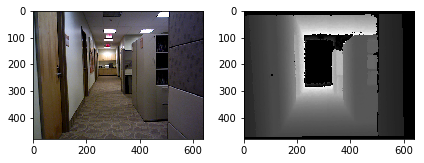

('cropped shapes', (450, 550))


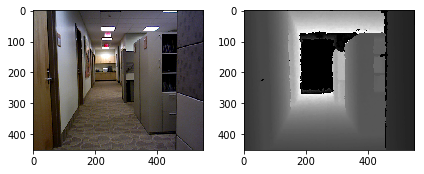

('resized shapes', (192, 256))


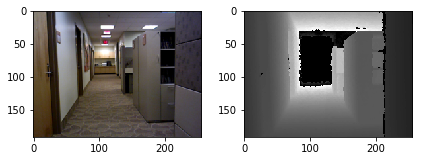

In [2]:
#Visualization of the preprocessint step for image and depth \
#Preprocessing:
#cropping data: from 640x480 to 550x450 
#resizing data: from  550x450  to 256x192


import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import scipy.misc
import tools.makeTFrecords as mtf



#the lists of train and test images alighned by timestamps
lists_train_images='./lists/image_train.txt'
lists_train_depths='./lists/depth_train.txt'

input_list=mtf.read_file(lists_train_images)
output_list=mtf.read_file(lists_train_depths)


#1 visualize first example
img = np.array(io.imread(input_list[0]))
depth =  np.array(io.imread(output_list[0]))
print('shapes',depth.shape)
fig = plt.figure()
fig.add_subplot(1,2,1)
io.imshow(img)
fig.add_subplot(1,2,2)
io.imshow(depth)
plt.show()
#2 crop
croped_image=mtf.centered_crop(img,550,450)
croped_depth=mtf.centered_crop(depth,550,450)
print('cropped shapes',croped_depth.shape)
fig = plt.figure()
fig.add_subplot(1,2,1)
io.imshow(croped_image)
fig.add_subplot(1,2,2)
io.imshow(croped_depth)
plt.show()
#3 resize
resized_image=scipy.misc.imresize(croped_image, (192,256), interp='bilinear', mode=None)
resized_depth=scipy.misc.imresize(croped_depth, (192,256), interp='nearest', mode=None)
print('resized shapes',resized_depth.shape)
fig = plt.figure()
fig.add_subplot(1,2,1)
io.imshow(resized_image)
fig.add_subplot(1,2,2)
io.imshow(resized_depth)
plt.show()

('example number:', 1)


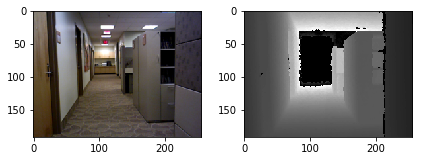

('example number:', 2)


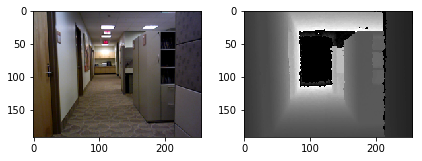

('example number:', 3)


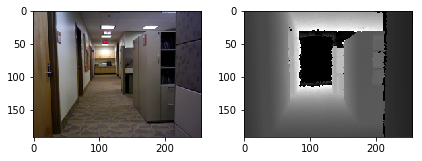

('example number:', 4)


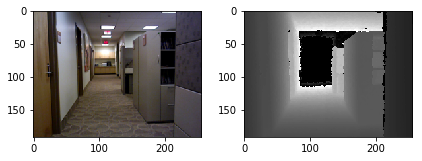

('example number:', 5)


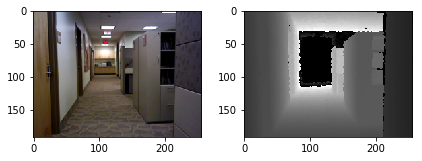

('example number:', 6)


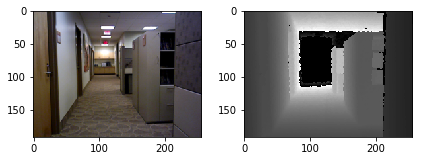

('example number:', 7)


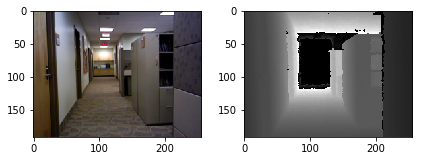

('example number:', 8)


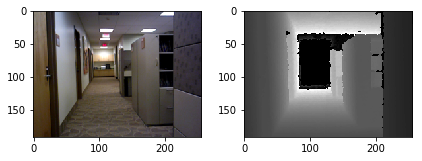

('example number:', 9)


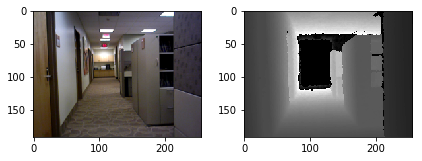

('example number:', 10)


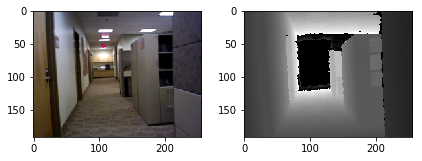

('example number:', 11)


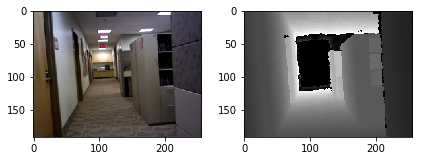

('example number:', 12)


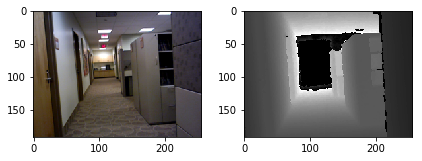

('example number:', 13)


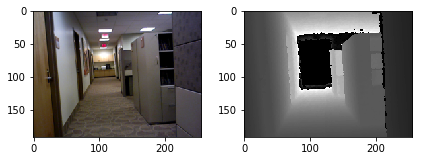

('example number:', 14)


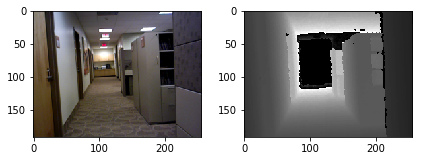

('example number:', 15)


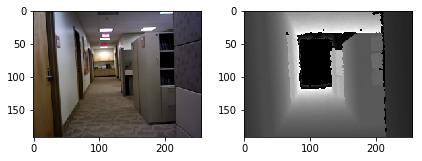

('example number:', 16)


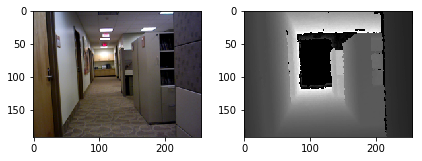

('example number:', 17)


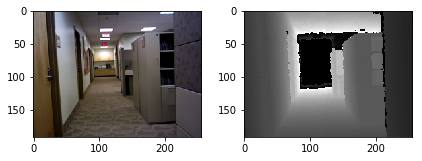

('example number:', 18)


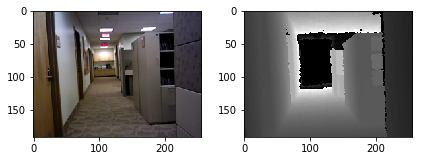

('example number:', 19)


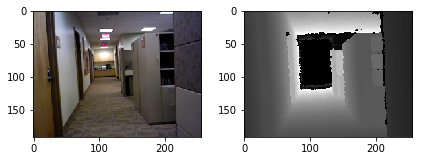

('example number:', 20)


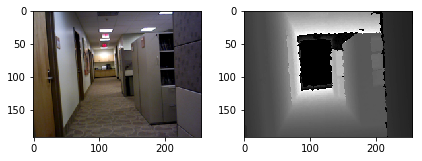

('example number:', 21)


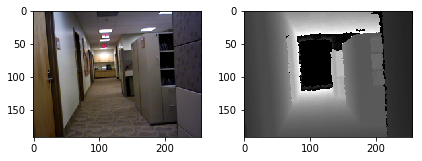

('example number:', 22)


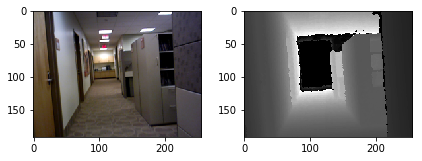

('example number:', 23)


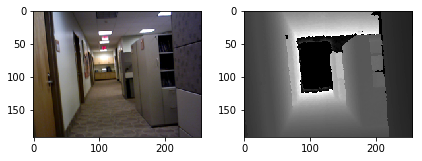

('example number:', 24)


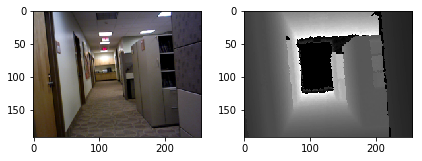

('example number:', 25)


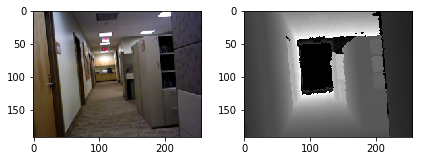

('example number:', 26)


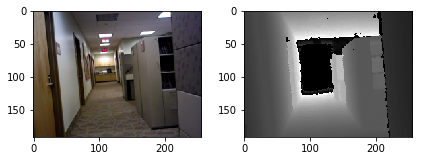

('example number:', 27)


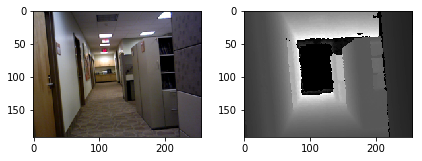

('example number:', 28)


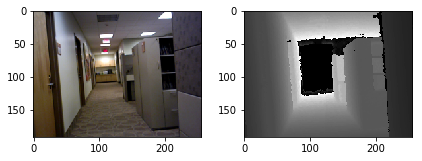

('example number:', 29)


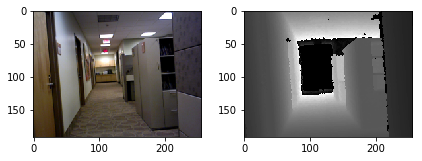

('example number:', 30)


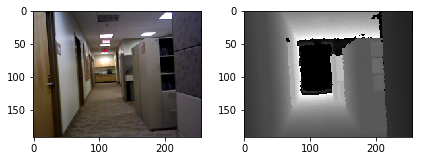

('example number:', 31)


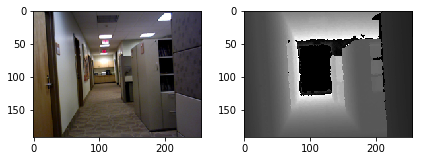

('example number:', 32)


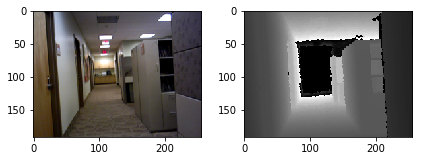

('example number:', 33)


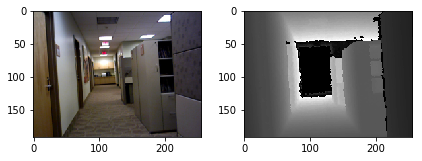

('example number:', 34)


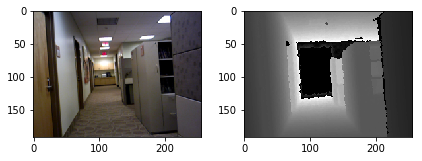

('example number:', 35)


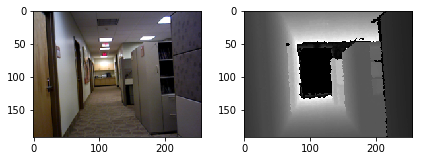

('example number:', 36)


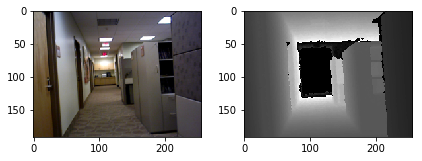

('example number:', 37)


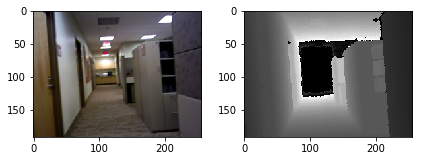

('example number:', 38)


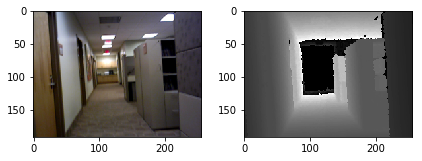

('example number:', 39)


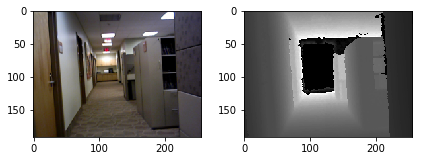

('example number:', 40)


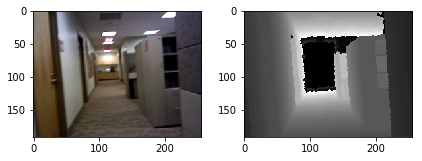

('example number:', 41)


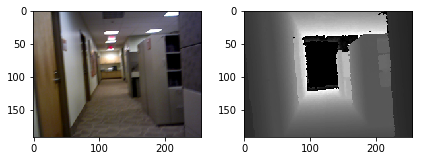

('example number:', 42)


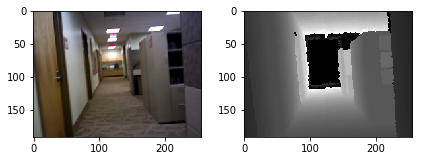

('example number:', 43)


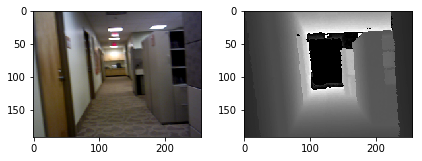

('example number:', 44)


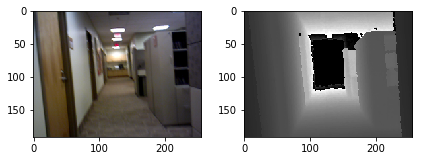

('example number:', 45)


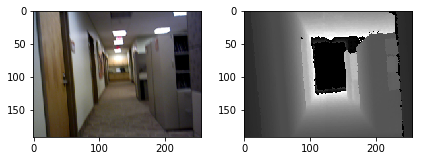

('example number:', 46)


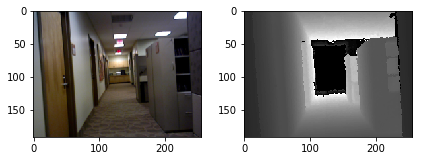

('example number:', 47)


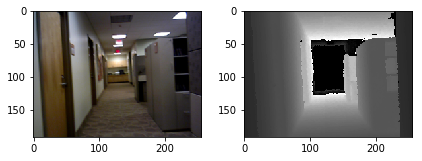

('example number:', 48)


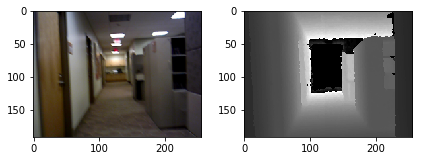

('example number:', 49)


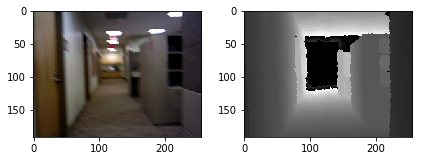

('example number:', 50)


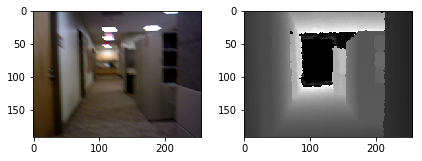

In [29]:
#visualisation of the tf recors datasets pairs of images
import tensorflow as tf
import time
tfrecords_filename='./dataset/train_sun3d.tfrecords'
reconstructed_images = []

num_smpls_vis=50
counter=0
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)


for string_record in record_iterator:
    fig = plt.figure()
    counter+=1
    print('example number:',counter)

    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    height = int(example.features.feature['height']
                                 .int64_list
                                 .value[0])
    
    width = int(example.features.feature['width']
                                .int64_list
                                .value[0])
    
    img_string = (example.features.feature['image_raw']
                                  .bytes_list
                                  .value[0])
    
    depth_string = (example.features.feature['depth_raw']
                                .bytes_list
                                .value[0])
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape((height, width, -1))
    fig.add_subplot(1,2,1)
    io.imshow(reconstructed_img)

    depth__1d = np.fromstring(depth_string , dtype=np.uint8)
    
    # depth don't have depth (3rd dimension)
    reconstructed_depth = depth__1d.reshape((height, width))
    fig.add_subplot(1,2,2) 
    io.imshow(reconstructed_depth)
    plt.show()
    time.sleep(0.5)
    if counter==num_smpls_vis:
        break
   # reconstructed_images.append((reconstructed_img, reconstructed_annotation))


